In [2]:
pip install h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.0 MB/s 


In [3]:
import numpy as np
import pandas as pd
import h3.api.numpy_int as h3

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path = '/content/drive/MyDrive/DSSG (STC   UNICEF)/data'

In [5]:
nga_dhs = pd.read_csv(path + '/raw/dhs/clean_nga_dhs.csv')

In [6]:
nga_dhs.head(2)

,countrycode,year,survey,round,cluster,hhid,indid,location,sex,wealth,...,dep_nutrition_sev,dep_health_sev,dep_education_sev,deprived_sev,region,region2,dhscode,LATNUM,LONGNUM,hex_code
0,NGA,2018.0,DHS,72,1,35,3,1,2,5.0,...,0.0,NaN,NaN,0,1,180.0,nga72,7.720049,8.506936,609550763097587711
1,NGA,2018.0,DHS,72,1,25,3,1,1,5.0,...,NaN,0.0,NaN,0,1,180.0,nga72,7.720049,8.506936,609550763097587711


In [7]:
nga_dhs.columns

Index(['countrycode', 'year', 'survey', 'round', 'cluster', 'hhid', 'indid',
       'location', 'sex', 'wealth', 'wealthscore', 'age', 'hhweight',
       'sumpoor_sev', 'dep_housing_sev', 'dep_water_sev', 'dep_sanitation_sev',
       'dep_nutrition_sev', 'dep_health_sev', 'dep_education_sev',
       'deprived_sev', 'region', 'region2', 'dhscode', 'LATNUM', 'LONGNUM',
       'hex_code'],
      dtype='object')

In [8]:
# Add the hexagonal code of h3 with resolution 6 
nga_dhs['hex_code_6'] = nga_dhs.apply(lambda x: h3.geo_to_h3(lat=x['LATNUM'], lng=x['LONGNUM'], resolution=6), axis=1)

In [10]:
# Take the mean of the other columns in each hexagon
nga_6 = nga_dhs.groupby('hex_code_6', as_index=False).mean()

,hex_code_6,year,round,cluster,hhid,indid,location,sex,wealth,wealthscore,...,dep_sanitation_sev,dep_nutrition_sev,dep_health_sev,dep_education_sev,deprived_sev,region,region2,LATNUM,LONGNUM,hex_code
0,605030610481709055,2018.0,72.0,739.0,103.803738,5.523364,2.0,1.439252,1.140187,-124478.626168,...,0.943925,0.500000,0.400000,0.636364,1.000000,3.0,20.0,13.082262,6.417623,6.095342e+17
1,605030614508240895,2018.0,72.0,701.0,21.901099,5.219780,2.0,1.505495,1.461538,-108688.439560,...,0.692308,0.538462,0.294118,0.694915,0.846154,3.0,10.0,13.282610,6.368814,6.095342e+17


In [ ]:
# Drop column hex_code that is the code of resolution 7
nga_6.drop('hex_code', inplace=True, axis=1)
nga_6.head()

,hex_code_6,year,round,cluster,hhid,indid,location,sex,wealth,wealthscore,...,dep_water_sev,dep_sanitation_sev,dep_nutrition_sev,dep_health_sev,dep_education_sev,deprived_sev,region,region2,LATNUM,LONGNUM
0,605030610481709055,2018.0,72.0,739.0,103.803738,5.523364,2.0,1.439252,1.140187,-124478.626168,...,0.000000,0.943925,0.500000,0.400000,0.636364,1.000000,3.0,20.0,13.082262,6.417623
1,605030614508240895,2018.0,72.0,701.0,21.901099,5.219780,2.0,1.505495,1.461538,-108688.439560,...,0.000000,0.692308,0.538462,0.294118,0.694915,0.846154,3.0,10.0,13.282610,6.368814
2,605030629674844159,2018.0,72.0,738.0,26.513889,5.125000,2.0,1.444444,1.027778,-135450.652778,...,0.000000,0.902778,0.333333,0.466667,0.980769,0.986111,3.0,20.0,12.727340,6.168603
3,605030632493416447,2018.0,72.0,733.0,16.504202,6.647059,2.0,1.504202,1.067227,-136376.226891,...,0.378151,0.907563,0.250000,0.393939,0.753425,0.949580,3.0,20.0,12.770098,5.826144
4,605030635848859647,2018.0,72.0,699.0,21.633333,6.300000,2.0,1.477778,1.555556,-97301.866667,...,0.400000,0.544444,0.111111,0.300000,0.607143,0.833333,3.0,10.0,13.539368,5.990493


In [ ]:
# Number of observation with ground truth data
nga_6.shape

(1237, 25)

In [ ]:
# Compute the number of children in each hexagon
num_children = nga_dhs.groupby('hex_code_6', as_index=False)['cluster'].count()
num_children.rename(columns={'cluster':'num_children'}, inplace=True)
nga_6 = pd.merge(nga_6, num_children, how='left', on='hex_code_6')

In [ ]:
# Distribution of the number of children per hexagon
nga_6['num_children'].describe()

count    1237.000000
mean       77.755861
std        43.387285
min         6.000000
25%        46.000000
50%        68.000000
75%       100.000000
max       472.000000
Name: num_children, dtype: float64

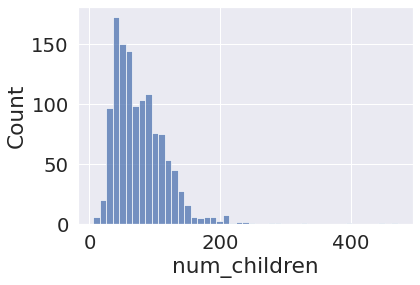

In [ ]:
sns.histplot(data = nga_6, x = 'num_children')

# Compute number of hexagons with neighbors [TO DO]